# hw-3 Final Submission
### Team-members:
* Prateesh Reddy Patlolla (prpatlol)
* Majeske Nicholas Huckvale   (nmajeske)

Problem Statements : [hw3.pdf](https://github.iu.edu/CSCI-P556-Spring-2021/P556-prpatlol/blob/master/hw3/hw3.pdf)

## Question 1: Solving the parity problem

In [61]:
# importing the required libraries

# Q1
import numpy as np
from copy import deepcopy
import seaborn as sb
import matplotlib.pyplot as plt

In [62]:
# function for converting integer(10) to binary(2)
def integerToBinary(num):
    return np.unpackbits(np.arange(num, num+1, dtype='>i%d' %(1)).view(np.uint8))[-4:]

In [63]:
# Example : 12 -> 1 1 0 0 
integerToBinary(12)

array([1, 1, 0, 0], dtype=uint8)

In [64]:
def getTrainData():
    X_init = np.array([[1] + list(integerToBinary(i)) for i in range(0,16)])
#     print("Input X before transpose (1 + binary values from 0 to 16): \n",X_init)
# creating an input marix of shape 1x16
    X = X_init.T
    D_init = np.array([bin(i).count("1")%2!=0 for i in range(0,16)])
#     print("\n D is True for even no of 1's and False for odd no of 1's: \n",D_init)
# converting D into int 
    D = D_init.reshape(1,16).astype(int)
    return X,D

In [65]:
# Note : Printing X,D is just for understanding purpose only final values are returned 
getTrainData()

(array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
        [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]]),
 array([[0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]]))

In [66]:
# method to intialize weights with random numbers in range (-1,1)
def intializeWeights():
    # Shape of W 5x4 , Shape of b 5x1, 5,4|5,1
    return [np.random.uniform(-1, 1, (5, 4))] + [np.random.uniform(-1, 1, (5, 1))]

# defining sigmoid activation fxn
def sigmoid(z):
    return 1/(1 + np.exp(-z))


In [67]:
sigmoid(0.5)

0.6224593312018546

In [68]:
def forwardProp(x,W_layers):
    output = []
    output.append(sigmoid(np.dot(W_layers[0].T,x)))
    output.append(sigmoid(np.dot(W_layers[1].T,np.insert(output[0],0,1,axis=0))))
    return np.array(output)

In [69]:
def backProp(x,Y,d_k,W,eta,d_w,alpha):
    y_hat = Y[1]

    d_k = y_hat*(1-y_hat)*(d_k-y_hat)
    d_w[1] = eta*d_k.T*np.insert(Y[0],0,1,axis=0)+(alpha*d_w[1])

    d_j = Y[0]*(1-Y[0])*W[1][1:,:]*d_k
    d_w[0] = eta*d_j.T*x+(alpha*d_w[0])

    W[0] += d_w[0]
    W[1] += d_w[1]

In [87]:
def main_pf(X,D,W,eta,alpha):
    epoch = 0
    d_w = [np.zeros((5, 4))] + [np.zeros((5, 1))]
    error = []
    while True:
        isError = True
        stochaistic_X = np.random.permutation(X)
        for i in range(0,16):
            x = stochaistic_X[:,i].reshape(5,1)
            Y = forwardProp(x,W)
            backProp(x, Y, np.reshape(D[:, i], (1, 1)), W, eta, d_w, alpha)
            er = np.abs(np.squeeze(D[:,i]-Y[1]))
            error.append(er)
            if er <= 0.05:
                isError = False
            else:
                isError = True
                
#         if epoch % 1000 == 0:
#             print('Epoch: ', epoch)
        epoch += 1
        if not isError:
            break
   
    # sb.distplot(np.array(error))
    return epoch,error

Varying the value of `eta` from 0.05 to 0.5 using an increment of 0.05. 

<ipython-input-68-ec879ce6e193>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(output)


eta :  0.05 , momentum :  0  epoch :  423433
eta :  0.05 , momentum : 0.9  epoch :  9803


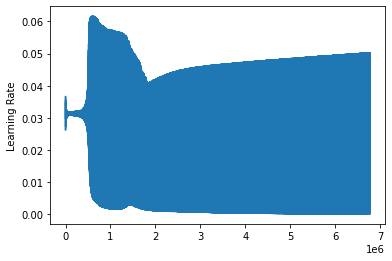

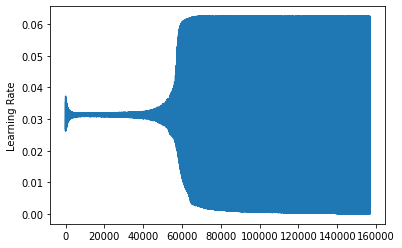

<ipython-input-68-ec879ce6e193>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(output)


In [ ]:
# if __name__ == "__main__":

X,D = getTrainData()
W = intializeWeights()
for eta in np.arange(0.05, 0.51, 0.05):
    epoch,error = main_pf(X, D, deepcopy(W), eta, 0)
    epoch_m,error_m = main_pf(X, D, deepcopy(W), eta, 0.9)
    print("eta : ", eta, ", momentum : ", 0, " epoch : ", epoch)
    print("eta : ", eta, ", momentum :", 0.9, " epoch : ", epoch_m)
    plt.plot(np.array(error)/16)
    plt.ylabel('Learning Rate')
    plt.show()
    plt.plot(np.array(error_m)/16)
    plt.ylabel('Learning Rate')
    plt.show()